In [2]:
import numpy as np
import PIL.Image as Image
import load
import augment
import os
import pandas as pd
import matplotlib.pyplot as plt
import torch
import random
import torch.nn.functional as F


In [166]:
import numpy as np
import SimpleITK as sitk

def gaussian_filter_sitk(volume, radius):
    image = sitk.GetImageFromArray(volume)
    smoothed_image = sitk.SmoothingRecursiveGaussian(image, radius)
    return sitk.GetArrayFromImage(smoothed_image)

def get_heatmap(shape, pts, radius): 
    volume = np.zeros(shape, dtype=np.float32)
    for pt in pts: 
        pt = tuple(np.rint(pt).astype(int))
        if all(0 <= pt[i] < shape[i] for i in range(3)):
            volume[pt] = 1.0
    volume = gaussian_filter_sitk(volume, radius)
    volume = volume / np.max(volume)
    return volume.astype(np.float16)


In [168]:
#Get the tomogram
tomo = 'tomo_00e463'
tomo_path = os.path.join('..', f'data/train/{tomo}')
src = load.load_tomo(tomo_path)
pts = load.load_pts(name=tomo)
#Get the heatmap
tgt = get_heatmap(
    src.shape,
    pts=pts, 
    radius=30)

In [186]:
tgt.max()

tensor(1., dtype=torch.float16)

In [170]:
gpu = False
src = torch.Tensor(src).to(torch.float16)
tgt = torch.Tensor(tgt).to(torch.float16)

metatensor(0.7894)


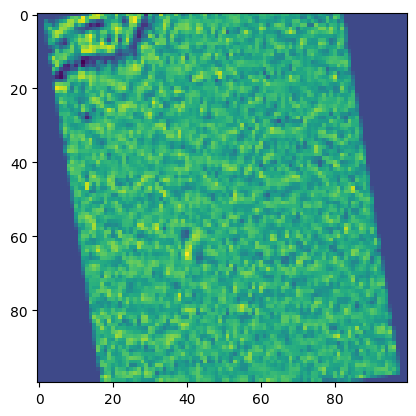

In [185]:
aug_params = {
    "patch_size": (100,100,100),
    "final_size":   (100,100,100),
    "flip_prob":  0.5,
    "rot_prob":   1.0,
    "scale_prob": 1.0,
    "rot_range":  np.pi,
    "scale_range": 0.2
}
# sample = {'src':src,'tgt':tgt}
# sample = augment.rand_aug(
#     sample=sample,
#     aug_params=aug_params,
#     gpu=gpu)
plt.imshow(sample['src'][0,10,:,:], cmap='viridis')
# plt.imshow(sample['tgt'][0,50,:,:], cmap='viridis')
print(sample['tgt'][0,10].max())

In [30]:
df = pd.read_csv(os.path.join('..','data/train_labels.csv'))
# Assuming df is your DataFrame
df['Product'] = df['Array shape (axis 0)'] * df['Array shape (axis 1)'] * df['Array shape (axis 2)']
total_sum = df['Product'].sum()
print("Total bytes of dataset using fp16")
print(total_sum * 2)
kb = total_sum / 1024 * 2
print("kb: ", kb)
mb = kb / 1024
print("mb: ", mb)
gb = mb / 1024
print("gb: ", gb)

Total bytes of dataset using fp16
570717359432
kb:  557341171.3203125
mb:  544278.4876174927
gb:  531.5219605639577


In [25]:
tomo_path = os.path.join('..', 'data/train/tomo_0a8f05')
volume = load.load_tomo(tomo_path)

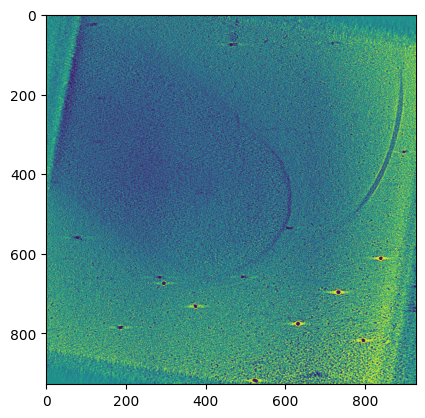

In [31]:
plt.imshow(volume[150, :, :], cmap="viridis")